# **Investigating the effects of noise seeds**




### *1. Load in the required packages for this notebook*

In [8]:
%pylab inline
import sys, os, time
import numpy as np
import showcase1_ageing as utils
from tvb.simulator.lab import *
from tvb.simulator.backend.nb_mpr import NbMPRBackend
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter

Populating the interactive namespace from numpy and matplotlib


### *2. Run a default simulation*


In [9]:
# Define the function to Load in the SC file - function to be called later
def get_connectivity(scaling_factor,sc_path):
        SC = np.loadtxt(sc_path)
        SC = SC / scaling_factor
        conn = connectivity.Connectivity(
                weights = SC,
                tract_lengths=np.ones_like(SC),
                centres = np.zeros(np.shape(SC)[0]),
                speed = np.r_[np.Inf]
        )
        conn.compute_region_labels()

        return conn
    
# Declare the subject directory
sub_dir='../Session_3-Simulation/sub-0001/' #MODIFY


scaling_factor=1     #scaling the SC matrix - strength of connections not changed when 1 - no normalization
sc_path = os.path.join(sub_dir,'weights.txt')


# Specify the model and model initial parameter values
G=1.993
nsigma=0.04
dt=0.005    #integration step size

sim_len=6e3 #length of simulation - units depend on setup

# Set up a simulation object
sim = simulator.Simulator(
    connectivity = get_connectivity(scaling_factor,sc_path),
    model = models.MontbrioPazoRoxin(
        eta   = np.r_[-4.6],
        J     = np.r_[14.5],
        Delta = np.r_[0.7],
        tau   = np.r_[1.],
    ),
    coupling = coupling.Linear(a=np.r_[G]),
    integrator = integrators.HeunStochastic(
        dt = dt,
        noise = noise.Additive(nsig=np.r_[nsigma, nsigma*2])
    ),
    monitors = [monitors.TemporalAverage(period=0.1)]
).configure()



# Run the simulation
runner = NbMPRBackend()

start_time = time.time() #mark start time 

(tavg_t, tavg_d), = runner.run_sim(sim, simulation_length=sim_len)   #run the sim

end_time = time.time() #mark end time
elapsed_time = end_time - start_time
print(f"Simulation took: {elapsed_time} seconds")

tavg_t *= 10 #convert simulation timepoints to ms


Simulation took: 73.55711317062378 seconds


Visualizing the simulated data.

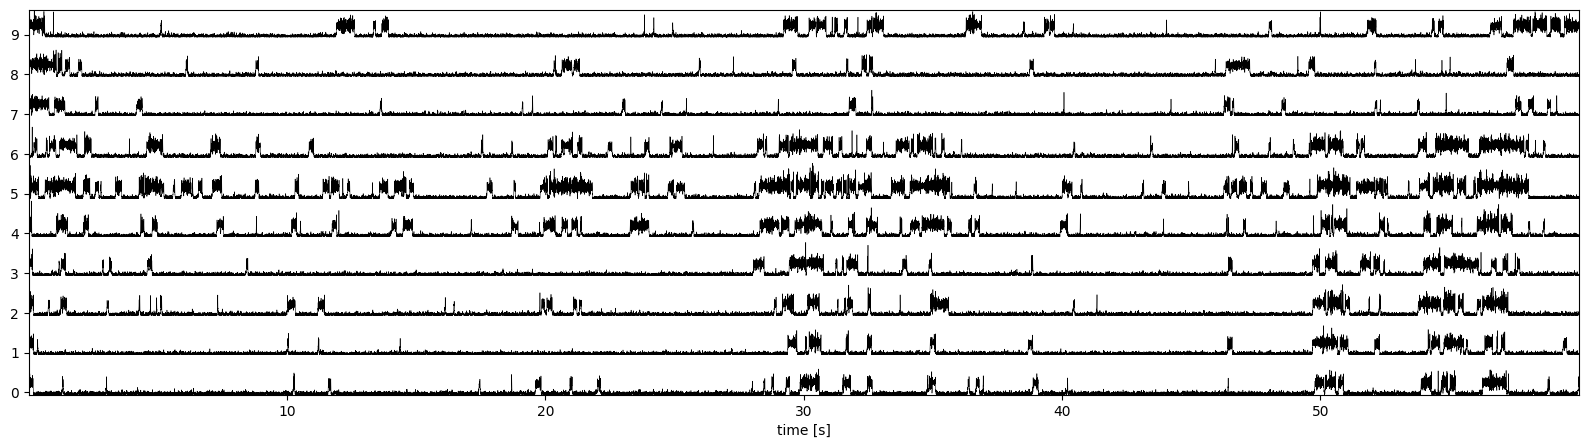

In [10]:
#Plot the simulated data - firing rate
ax = utils.plot_ts_stack(tavg_d[:, 0, :10, 0], x=tavg_t[:]/1000, width=20)
ax.set(xlabel='time [s]');

### *3. Run the default simulation again*


In [11]:
# Define the function to Load in the SC file - function to be called later
def get_connectivity(scaling_factor,sc_path):
        SC = np.loadtxt(sc_path)
        SC = SC / scaling_factor
        conn = connectivity.Connectivity(
                weights = SC,
                tract_lengths=np.ones_like(SC),
                centres = np.zeros(np.shape(SC)[0]),
                speed = np.r_[np.Inf]
        )
        conn.compute_region_labels()

        return conn
    
# Declare the subject directory
sub_dir='../Session_3-Simulation/sub-0001/' #MODIFY


scaling_factor=1     #scaling the SC matrix - strength of connections not changed when 1 - no normalization
sc_path = os.path.join(sub_dir,'weights.txt')


# Specify the model and model initial parameter values
G=1.993
nsigma=0.04
dt=0.005    #integration step size

sim_len=6e3 #length of simulation - units depend on setup

# Set up a simulation object
sim = simulator.Simulator(
    connectivity = get_connectivity(scaling_factor,sc_path),
    model = models.MontbrioPazoRoxin(
        eta   = np.r_[-4.6],
        J     = np.r_[14.5],
        Delta = np.r_[0.7],
        tau   = np.r_[1.],
    ),
    coupling = coupling.Linear(a=np.r_[G]),
    integrator = integrators.HeunStochastic(
        dt = dt,
        noise = noise.Additive(nsig=np.r_[nsigma, nsigma*2])
    ),
    monitors = [monitors.TemporalAverage(period=0.1)]
).configure()



# Run the simulation
runner = NbMPRBackend()

start_time = time.time() #mark start time 

(tavg_t, tavg_d), = runner.run_sim(sim, simulation_length=sim_len)   #run the sim

end_time = time.time() #mark end time
elapsed_time = end_time - start_time
print(f"Simulation took: {elapsed_time} seconds")

tavg_t *= 10 #convert simulation timepoints to ms


Simulation took: 73.52848529815674 seconds


Visualizing the simulated data (again).

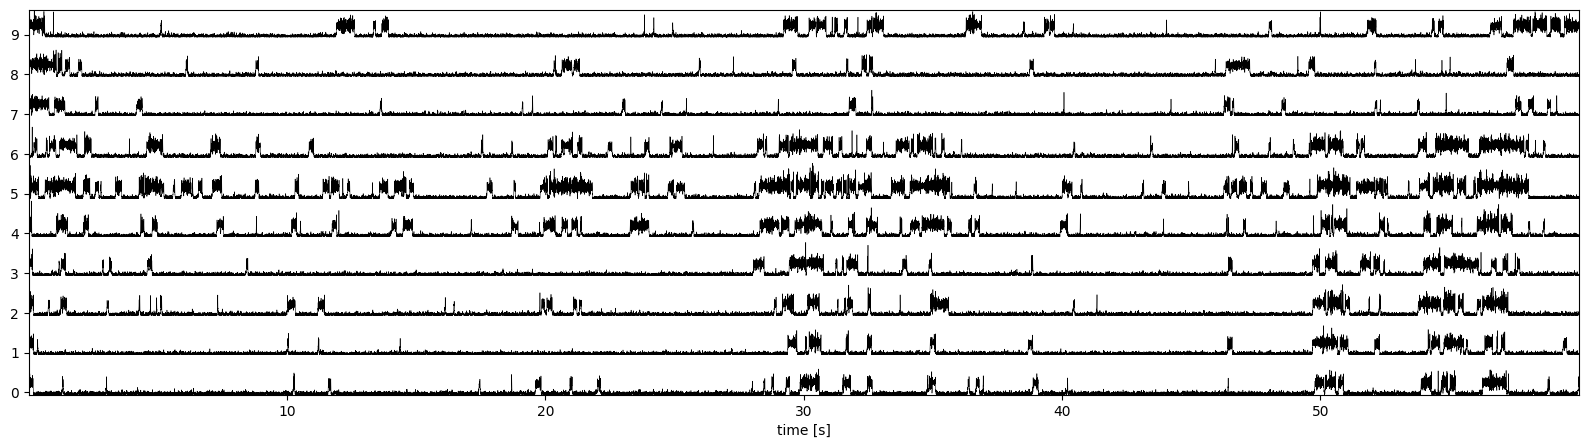

In [12]:
#Plot the simulated data - firing rate
ax = utils.plot_ts_stack(tavg_d[:, 0, :10, 0], x=tavg_t[:]/1000, width=20)
ax.set(xlabel='time [s]');

### *4. Running the same simulation with a different noise seed*


In [13]:
# Define the function to Load in the SC file - function to be called later
def get_connectivity(scaling_factor,sc_path):
        SC = np.loadtxt(sc_path)
        SC = SC / scaling_factor
        conn = connectivity.Connectivity(
                weights = SC,
                tract_lengths=np.ones_like(SC),
                centres = np.zeros(np.shape(SC)[0]),
                speed = np.r_[np.Inf]
        )
        conn.compute_region_labels()

        return conn
    
# Declare the subject directory
sub_dir='../Session_3-Simulation/sub-0001/' #MODIFY


scaling_factor=1     #scaling the SC matrix - strength of connections not changed when 1 - no normalization
sc_path = os.path.join(sub_dir,'weights.txt')


# Specify the model and model initial parameter values
G=1.993
nsigma=0.04
dt=0.005    #integration step size

sim_len=6e3 #length of simulation - units depend on setup

# Set up a simulation object
sim = simulator.Simulator(
    connectivity = get_connectivity(scaling_factor,sc_path),
    model = models.MontbrioPazoRoxin(
        eta   = np.r_[-4.6],
        J     = np.r_[14.5],
        Delta = np.r_[0.7],
        tau   = np.r_[1.],
    ),
    coupling = coupling.Linear(a=np.r_[G]),
    integrator = integrators.HeunStochastic(
        dt = dt,
        noise = noise.Additive(nsig=np.r_[nsigma, nsigma*2], noise_seed=20)
    ),
    monitors = [monitors.TemporalAverage(period=0.1)]
).configure()



# Run the simulation
runner = NbMPRBackend()

start_time = time.time() #mark start time 

(tavg_t, tavg_d), = runner.run_sim(sim, simulation_length=sim_len)   #run the sim

end_time = time.time() #mark end time
elapsed_time = end_time - start_time
print(f"Simulation took: {elapsed_time} seconds")

tavg_t *= 10 #convert simulation timepoints to ms


Simulation took: 73.89440059661865 seconds


Visualizing the simulated data (again).

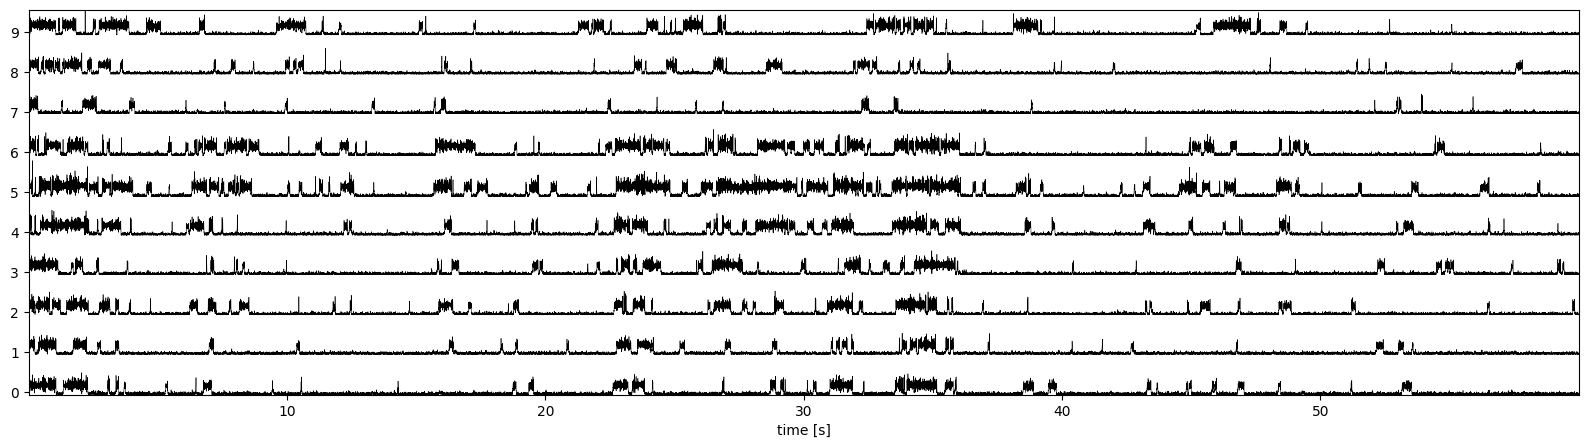

In [14]:
#Plot the simulated data - firing rate
ax = utils.plot_ts_stack(tavg_d[:, 0, :10, 0], x=tavg_t[:]/1000, width=20)
ax.set(xlabel='time [s]');